# Get the USA locations of users in Stack Exchange Data Dump by 2013
# Stack Exchange, Inc., and plot by states

## https://archive.org/details/stackexchange


In [10]:
import re
import os
import sys, getopt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import groupby

## STEP1, get the location

In [11]:
text_file=open("./location.out","a")
with open("./Users.xml") as f:
    for line in f:
        result =re.search('Location=(.+?)AboutMe=',line) # grep all contents between strings
        if result:
            found =result.group(1)
            text_file.write("%s\n" %found.replace('\"','')) #get rid of double quotes
text_file.close()
#this location output file will be used for both USA and world programmer geographic distribution analyses

## STEP2, check if it is a USA state 

In [12]:
states = ("AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA",
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY")
#text_file=open("../data/usa_location.out","a")
states_count=list()
with open("./location.out") as f:
    for line in f:
        #if any(s in line for s in states):
        for state in states:
            if state in line: 
                #print state
                #print line
                #text_file.write('{0}'.format(line)) 
                states_count.append(state)

## STEP3, sort the list 

In [13]:
states_count.sort()
##sorted(states)
##count frequency of each elements in a list 
freq=[len(list(group)) for key, group in groupby(states_count)]
len(freq)

51

## STEP4, dataframe for analysis

In [14]:
data=zip(states,freq)
#dataframe a tuple
df = pd.DataFrame(data, columns=['state','user_numbers'])

#output dataframes to a file for Choropleths 
df.to_csv('usa_programmer_counts.out', sep='\t')

## STEP5, plot results

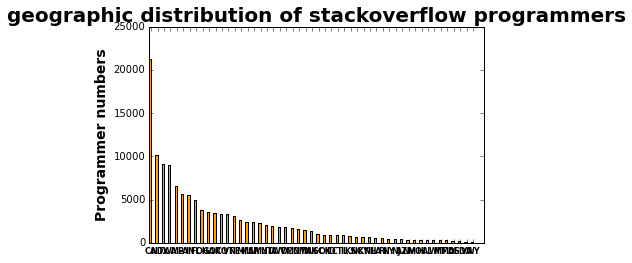

In [28]:
df1=df.sort(["user_numbers","state"],ascending=[0, 0])
fig=plt.figure()
ax =fig.add_subplot(111)
fig.subplots_adjust(bottom=0.15)

x=df1.state
y=df1.user_numbers

index =np.arange(51)
bar_width= 0.35
plt.bar(index,y,bar_width,color='orange')
plt.xlim(0,52)
plt.xticks(index + bar_width, x.tolist(),rotation=0,fontsize= 8, weight='bold')
plt.ylabel('States',fontsize= 14, weight='bold')
plt.ylabel('Programmer numbers',fontsize= 14, weight='bold')
plt.title("geographic distribution of stackoverflow programmers",fontsize= 20, weight='bold')
#plt.show()

In [27]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "./figure_1.png",width=1200 )